In [1]:
import numpy as np
from scipy.spatial import KDTree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
def euclid_distance(x, X_train):
    return np.sqrt(np.sum((x.reashpe(1, -1) - X_train)**2, axis=1))

In [3]:
class KNNClassifier:
    def __init__(self, k = 3):
        self.k = k
        self.tree = None
        self.label = None
        self.alogorithm = None
    
    def fit(self, X, y, algorithm='brute'):
        self.tree = KDTree(X)
        self.label = y
        self.alogorithm = algorithm
    
    def predict(self, X):
        if self.alogorithm == 'tree':
            distances, indeices = self.tree.query(X, k=self.k)
            votes = self.label[indeices]
            predictions = np.array([np.argmax(np.bincount(vote)) for vote in votes])
            return predictions
        elif self.alogorithm == 'brute':
            distances = np.linalg.norm(X[:, np.newaxis] - self.tree.data, axis=2)
            indeices = np.argsort(distances, axis=1)[:, :self.k]
            votes = self.label[indeices]
            predictions = np.array([np.argmax(np.bincount(vote)) for vote in votes])
            return predictions

In [4]:
class KNNRegressor:
    def __init__(self, k = 3):
        self.k = k
        self.tree = None
        self.label = None
        self.alogorithm = None
    
    def fit(self, X, y, algorithm='brute'):
        self.tree = KDTree(X)
        self.label = y
        self.alogorithm = algorithm
    
    def predict(self, X):
        if self.alogorithm == 'tree':
            distances, indeices = self.tree.query(X, k=self.k)
            predictions = np.mean(self.label[indeices], axis=1)
            return predictions
        elif self.alogorithm == 'brute':
            distances = np.linalg.norm(X[:, np.newaxis] - self.tree.data, axis=2)
            indeices = np.argsort(distances, axis=1)[:, :self.k]
            predictions = np.mean(self.label[indeices], axis=1)
            return predictions

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
knn_regresor = KNNRegressor(k=5)
knn_regresor.fit(X_train, y_train)
y_pred = knn_regresor.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

MSE: 3047.449887640449
RMSE: 55.203712625515045
MAE: 42.777528089887646
R2 Score: 0.42480887066066253


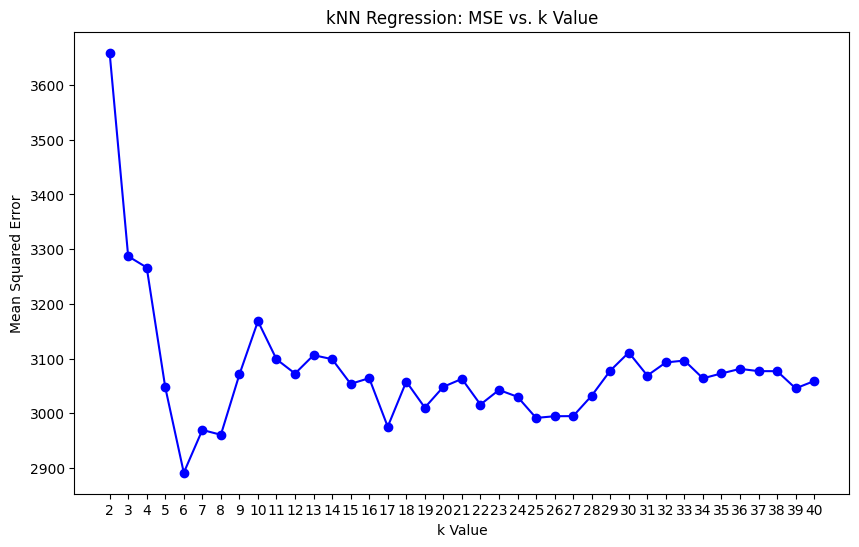

In [9]:
opt_k = range(2, 41)
mse_score = []

for k in opt_k:
    knn_regresor = KNNRegressor(k=k)
    knn_regresor.fit(X_train, y_train)
    y_pred = knn_regresor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_score.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(opt_k, mse_score, marker='o', linestyle='-', color='b')
plt.title('kNN Regression: MSE vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Mean Squared Error')
plt.xticks(opt_k)
plt.show() 

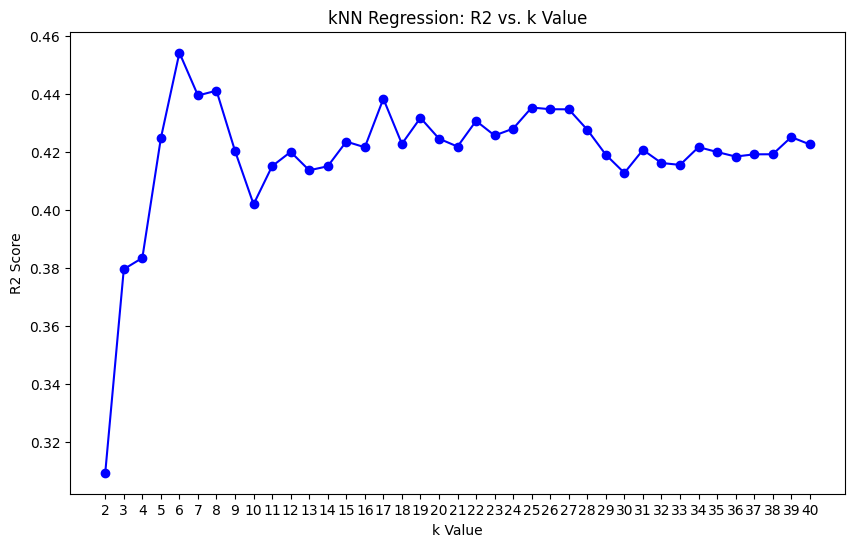

In [10]:
r2_scores = []
for k in opt_k:
    knn_regresor = KNNRegressor(k=k)
    knn_regresor.fit(X_train, y_train)
    y_pred = knn_regresor.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(opt_k, r2_scores, marker='o', linestyle='-', color='b')
plt.title('kNN Regression: R2 vs. k Value')
plt.xlabel('k Value')
plt.ylabel('R2 Score')
plt.xticks(opt_k)
plt.show()

In [11]:
opt_knn = KNNRegressor(k=6)
opt_knn.fit(X_train, y_train)
y_pred = opt_knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

MSE: 2891.338951310861
RMSE: 53.77117212141522
MAE: 42.03370786516854
R2 Score: 0.45427403959873547


In [12]:
from sklearn.neighbors import KNeighborsRegressor

sci_knn = KNeighborsRegressor(n_neighbors=6)
sci_knn.fit(X_train, y_train)
y_pred = sci_knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

MSE: 2891.338951310861
RMSE: 53.77117212141522
MAE: 42.03370786516854
R2 Score: 0.45427403959873547
